<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/Decision_Tree_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree for Regression
------------------------------------------------

## 1. Importing the libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## 2. Analyzing Data

In [295]:
data = pd.read_csv('/content/petrol_consumption.csv')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [296]:
data.info()  # no categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [297]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [298]:
data.isna().sum()  # No null value

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

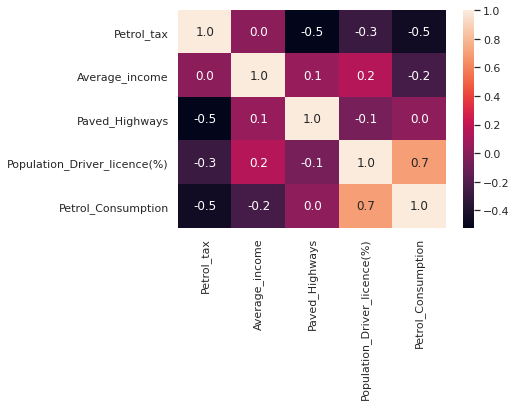

In [299]:
sns.heatmap(data.corr(),annot=True,fmt='.1f')

## 3. Visualizing data

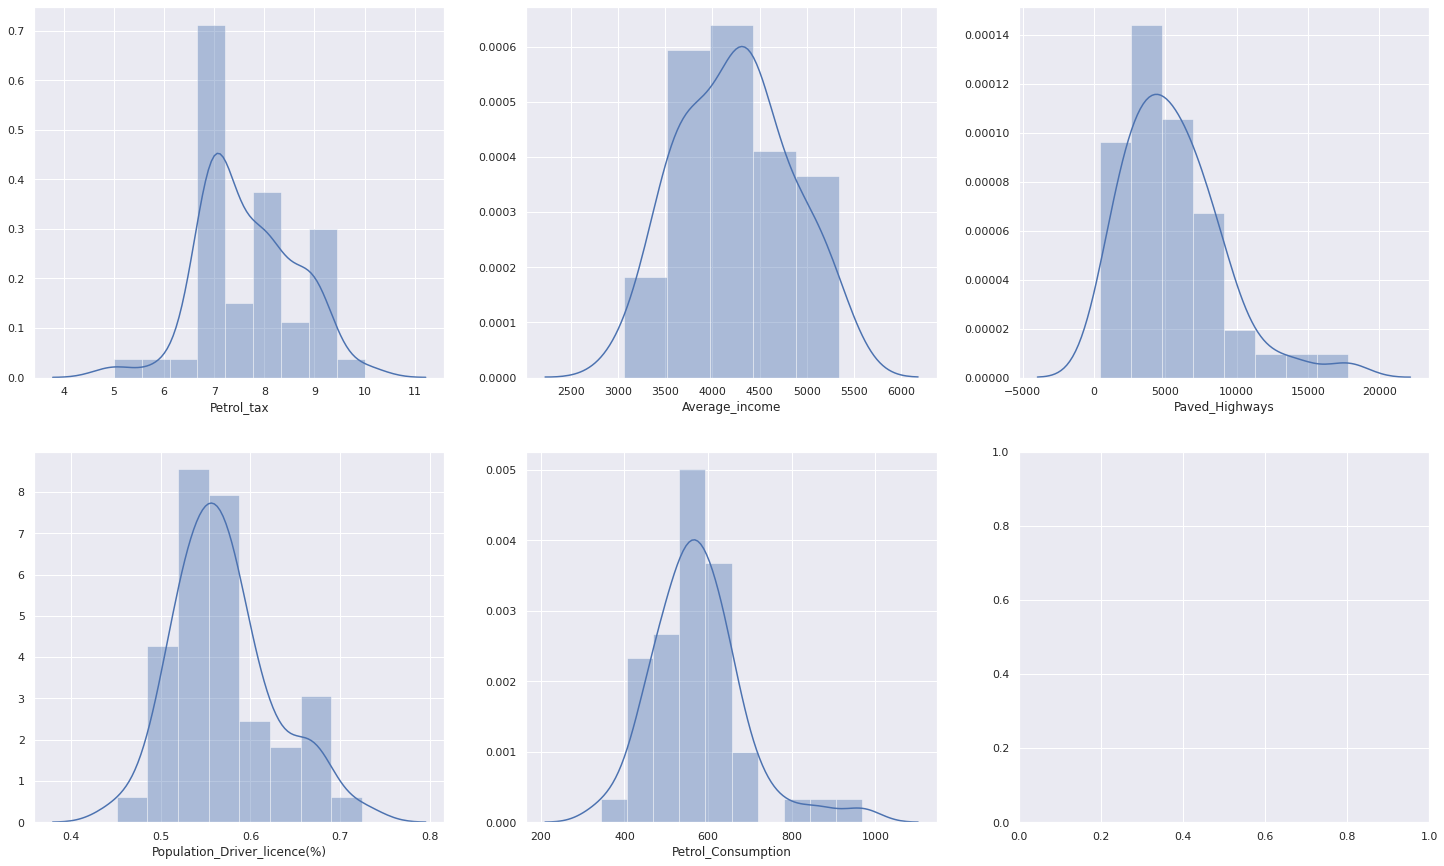

In [310]:
fig, arr=plt.subplots(2,3,figsize=(25,15))
k=1

for col in data.columns:
  plt.subplot(2,3,k)
  sns.distplot(data[col])
  k+=1

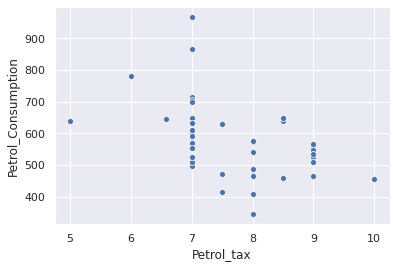

In [311]:
sns.scatterplot(x='Petrol_tax',y='Petrol_Consumption',data=data)

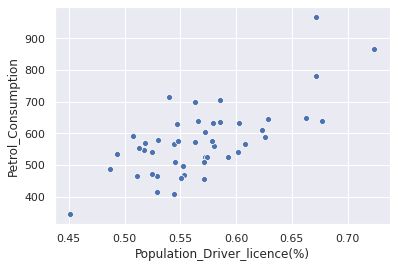

In [312]:
sns.scatterplot(x='Population_Driver_licence(%)',y='Petrol_Consumption',data=data)

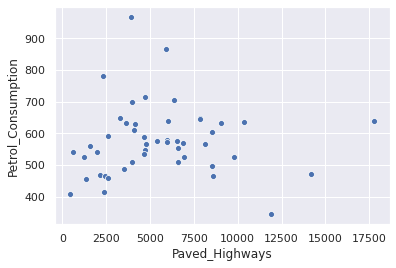

In [313]:
sns.scatterplot(x='Paved_Highways',y='Petrol_Consumption',data=data)

## 4. Splitting the data

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [0]:
x_train,x_test,y_train,y_test= tts(x,y,random_state=42,test_size=0.3)

## 5. Training the model

In [0]:
from sklearn.tree import DecisionTreeRegressor as dtr

In [0]:
model=dtr(criterion='mse',random_state=42)

In [346]:
model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

## 6. Testing the model

In [0]:
pred=model.predict(x_test)

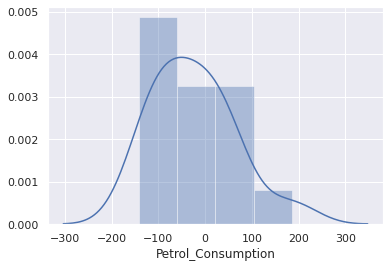

In [348]:
sns.distplot(y_test-pred)

## 7. Evaluation of Accuracy

In [0]:
from sklearn.metrics import r2_score , mean_squared_error as mse

In [350]:
np.sqrt(mse(y_test,pred))

87.96514461232168

In [351]:
r2_score(y_test,pred)  # 63% Accuracy

0.6319985525301763

## 8. Hyperparamter Tuning [GridsearchCV]

class sklearn.tree.DecisionTreeRegressor(*, 

criterion='mse', 

splitter='best',

max_depth=None,

min_samples_split=2, 

min_samples_leaf=1, 

min_weight_fraction_leaf=0.0, 

max_features=None, 

random_state=None, 

max_leaf_nodes=None, 

min_impurity_decrease=0.0, 

min_impurity_split=None, 

presort='deprecated', 

ccp_alpha=0.0)

In [0]:
param_grid={ 'criterion': ['mse','mae','friedman_mse'] ,
             'max_depth': np.arange(1,10),
             'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': np.arange(1,10),
             'min_samples_leaf' : np.arange(1,10),
            #  'ccp_alpha' : [0.1,0.01,0.001,0.001,0.2,0.3,0.5,0.8,0.9,1,1.5,2,2.5,3,3.5,4,5]
           }

In [0]:
from sklearn.model_selection import GridSearchCV as gs 

In [370]:
tree= dtr(random_state=42)
model_gs= gs(tree, param_grid,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
model_gs.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'l

In [371]:
model_gs.best_params_

{'criterion': 'mse',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [372]:
model_gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [0]:
pred=model_gs.predict(x_test)

In [374]:
np.sqrt(mse(y_test,pred))

91.6948941723799

In [375]:
r2_score(y_test,pred)  # 60% Accuracy - IMPROVED

0.6001302122781946

# Implementing a Random Forest Regression
----------------------------------------------

In [0]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [0]:
model_rfr=rfr(n_estimators=100,criterion='mse')

In [378]:
model_rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [379]:
model_rfr.score(x_train,y_train)

0.9107247689153294

In [0]:
pred=model_rfr.predict(x_test)

In [381]:
np.sqrt(mse(y_test,pred))

93.63732389740038

In [382]:
r2_score(y_test,pred)  

0.5830093937578709

## with GridSearch

In [0]:
param_grid={ 'criterion': ['mse','mae','friedman_mse'] ,
             'max_depth': np.arange(1,10),
             'max_features':  ['auto', 'sqrt', 'log2'],
            #  'min_samples_split': np.arange(1,8),
            #  'min_samples_leaf' : np.arange(1,10),
             'ccp_alpha' : [0.1,0.01,0.001,0.001,0.2,0.3,0.5,0.8,0.9,1,1.5,2,2.5,3,3.5,4,5]
           }

In [0]:
model_rfr=rfr()
model_new=gs(model_rfr,param_grid,scoring='neg_mean_squared_error',cv=5,)

In [214]:
model_new.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
  

In [0]:
pred=model_new.predict(x_test)

In [216]:
np.sqrt(mse(y_test,pred))

96.59484270847871

In [217]:
r2_score(y_test,pred)  # 60% Accuracy - IMPROVED

0.5562522498301543